# Gibbs sampling example for bivariate a nomial distribution

Let us have an example that Gibbs sampling 5000 repeated times when bivariate a nomial distribution such that:
- $[\mu_{1},\mu_{2}]= [0,0]$
- $\rho_{21}=0.8$
- $\rho_{12}=0.8$

In [16]:
import numpy as np

In [17]:
nSamples = 5000
mu = np.array([0,0]) # target mean
rho = np.zeros(2,dtype='float64')
rho[0] = 0.8 #rho_21
rho[1] = 0.8 #rho_12
rho

array([ 0.8,  0.8])

In [18]:
# INITIALIZE THE GIBBS SAMPLER
propSigma = 1
minn = [-3,-3]
maxx = [3, 3]

In [19]:
# INITIALIZE SAMPLES
x = np.zeros((nSamples,2),dtype='float64')
x[0,0] = np.random.uniform(minn[0],maxx[0])
x[0,1] = np.random.uniform(minn[1],maxx[1])
x

array([[-1.76193576, -2.09925965],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [20]:
dims = np.arange(2) # INDEX INTO EACH DIMENSION
iD = np.arange(2) # LOOP OVER DIMENSIONS
print(dims ,iD)

[0 1] [0 1]


## Generated samplies by Conditional distribution
We want to discover each conditional distribution from each variable when fixing the other variables except for the variable that was used.
It is proven that conditional mean and coditional variance are as follows :

$$\displaystyle{p(x_{1}|x_{2}^{(t-1)})=N(\mu_{1}+\rho_{21}(x_{2}^{(t-1)}-\mu_{2}),\sqrt{1-\rho_{21}^{2}})}$$

and

$$p(x_{2}|x_{1}^{(t)})=N(\mu_{2}+\rho_{12}(x_{1}^{(t)}-\mu_{1}),\sqrt{1-\rho_{12}^{2}})$$

There is the detailed [proof](http://fourier.eng.hmc.edu/e161/lectures/gaussianprocess/node7.html) why those are proven as above.

In [21]:
# RUN GIBBS SAMPLER
t=0
while (t < nSamples-1): # 0~4999 : 5000 samples
    t = t + 1 # this is for returning next step
    T = [t-1,t] # index for previous state and the following state
    #LOOP OVER DIMENSIONS
    for i in iD : # index for ith dimension
        #UPDATE SAMPLES
        nlx = ~(dims == i) #*NOT* THE CURRENT DIMENSION
        muCond = mu[i] + rho[i]*(x[T[i],nlx]-mu[nlx]) #CONDITIONAL MEAN
        varCond = np.sqrt(1-np.square(rho[i])) # CONDITIONAL VARIANCE
        x[t,i] = np.random.normal(muCond,varCond) #DRAW FROM CONDITIONAL
x

array([[-1.76193576, -2.09925965],
       [-1.45307316, -1.53393869],
       [-0.64917898, -0.29001964],
       ..., 
       [ 0.62320443, -0.18557342],
       [ 0.02913207, -0.75150832],
       [ 0.4766541 , -0.48900183]])

# Visualization of Gibbs sampling for bivariate a nomial distribution

- White points are generated samples by gibbs sampling
- Yellow points are 1st 50 samples 
- Green lines show the movements along each dimension independently
- A red point is a initial value generated randomly

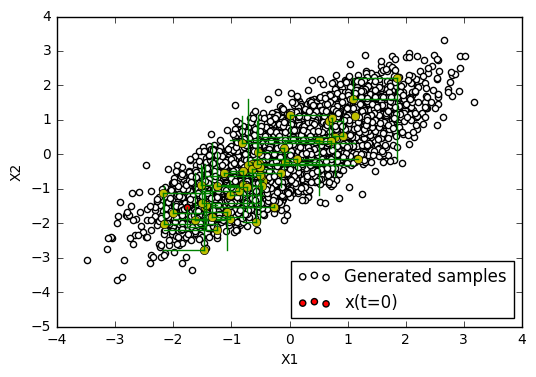

In [22]:
import matplotlib.pyplot as plt
h1 = plt.scatter(x[:,0],x[:,1],c='w', label='Samples')
for t in np.arange(50): # first 50 generated samples as blue point
    plt.plot((x[t,0],x[t+1,0]),(x[t,1],x[t,1]),'k-',c='green') # movement of X1 variable 
    plt.plot((x[t,0],x[t,0]),(x[t,1],x[t+1,1]),'k-',c='green') # movement of X2 variable 
    h2 = plt.plot(x[t+1,0],x[t+1,1],'ko',c='y') # the point of the respone value that is combination of X1 and X2 
    
h3 = plt.scatter(x[0,0],x[1,1], c='r',label='x(t=0)') # initial X1 and X2
plt.legend([h1, h3], ['Generated samples','x(t=0)'],loc=4)

plt.xlabel('X1')
plt.ylabel('X2')
plt.show()